# Podstawy seaborn

Zestaw ćwiczeń ilustrujący podstawy posługiwania się biblioteką seaborn w trybie proceduralnym.

Strona: https://seaborn.pydata.org/
Przykłady: https://seaborn.pydata.org/examples/index.html
API: https://seaborn.pydata.org/api.html

Importujemy dane ze zbioru zewnętrznego

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.get_dataset_names()
sns.set_theme(style="white")


## Zwykły scatterplot

- jak zmienić paletę barwną na spectral
- jak zredukować liczbę punktów (pandas)

Palety możemy dobierać zarówno z biblioteki seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html
jak i matplotlib: https://matplotlib.org/stable/gallery/color/colormap_reference.htm

Użyjemy zbioru danych **diamonds**. Seaborn dostarcza kilkanaście gotowych zbiorów w formacie DataFrame. Lista powyżej

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


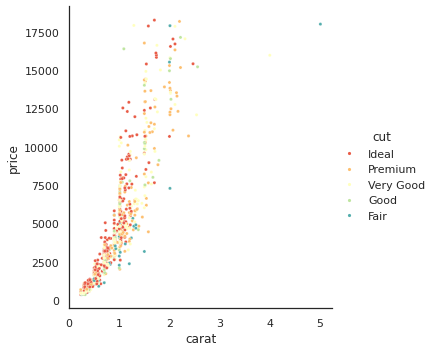

In [3]:
sns.relplot(diamonds.sample(1000),kind="scatter",x="carat",y="price",s=10,hue='cut',palette="Spectral")

Polecenie `sns.color_palette()` pozwala zarządzać, modyfikować i wybierać palety kolorów.

Użyte bez parametrów zwraca domyślną paletę. Użycie parametrów pozwala zbudować/zmodyfikować instniejącą paletę: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

In [4]:
sns.color_palette()


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Przykłady palet:

* modyfikacja istniejącej (seaborn lub matplotlib colormap)
* utworzenie własnej palety na podstawie barwy (jasnej lub ciemnej lub mieszanej)
* utworzenie palety pozwalajacej na utratę barwy do skali szarości na bez utraty zróżnicowaia
* utworzenie dowolnej palety

parametr `as_cmap=True` zwraca obiekt LinearSegmentedColorMap matplotlib

In [5]:
sns.color_palette("terrain",n_colors=12) #paleta z matplotlib

[(0.10065359477124183, 0.39869281045751637, 0.7986928104575164),
 (0.0, 0.6058823529411764, 0.9823529411764705),
 (0.0, 0.7627450980392158, 0.5117647058823529),
 (0.2235294117647059, 0.8447058823529412, 0.4447058823529412),
 (0.5372549019607841, 0.9074509803921569, 0.5074509803921569),
 (0.8509803921568627, 0.9701960784313726, 0.5701960784313725),
 (0.9254901960784314, 0.9046274509803922, 0.5597647058823529),
 (0.7686274509803921, 0.7038431372549019, 0.47505882352941176),
 (0.611764705882353, 0.5030588235294118, 0.39035294117647057),
 (0.5372549019607841, 0.4076862745098036, 0.3799215686274507),
 (0.6941176470588235, 0.6084705882352941, 0.5901176470588235),
 (0.8509803921568627, 0.8092549019607842, 0.800313725490196)]

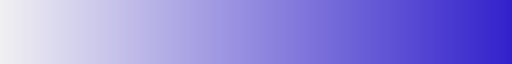

In [6]:
sns.color_palette("light:#32C",as_cmap=True) #paleta light
# #32C skrót do 3322CC

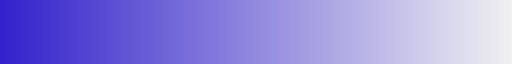

In [7]:
sns.light_palette("#32C",as_cmap=True,reverse=True) # parametr reverse może być użyty tylko z konkretną funkcją palety

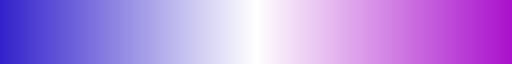

In [8]:
sns.color_palette("blend:#32C,#FFF,#A1C",as_cmap=True) #paleta dywergentna zrealizowana jako blend

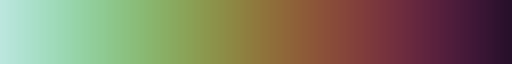

In [9]:
sns.color_palette("ch:s=0.11,rot=0.87,hue=1,dark=0.1",as_cmap=True) #paleta cubehelix

In [10]:
sns.color_palette(['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']) #tylko palety kategoryzowane

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

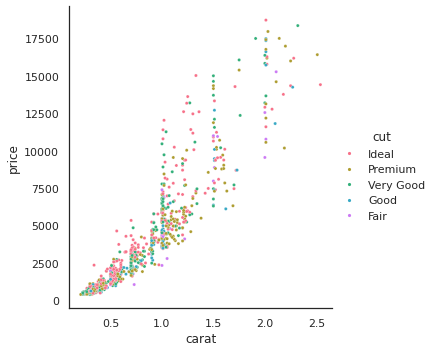

In [11]:
pal = sns.color_palette("husl", 5) # paleta komatybilna z ggplot.
_ = sns.relplot(diamonds.sample(1000),kind="scatter",x="carat",y="price",s=10,hue='cut',palette=pal) # zwracany obiekt wysyłany do null

### Praca własna:

Dobrać paletę kolorów tak aby była silnie nasycona i skontrastowana

## Relplot z podziałem na Facets

- jak sprawić aby cała rycina podzieliła się na pojedyncze wykresy
- jak ułożyć wykresy
- Jak pokolorować każdą z kolumn osobnym odcieniem (przygotowanie własnej palety)
- jak przenieść legendę

Ponownie użyjemy zbioru **diamonds**

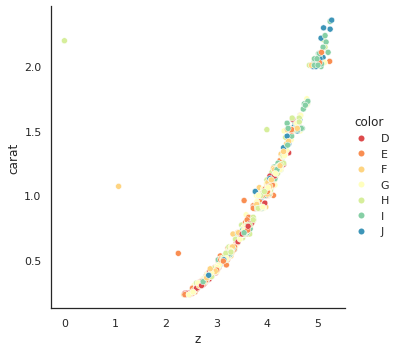

In [12]:
g = sns.relplot(diamonds.sample(1000),x="z",y="carat",hue="color",palette="Spectral")

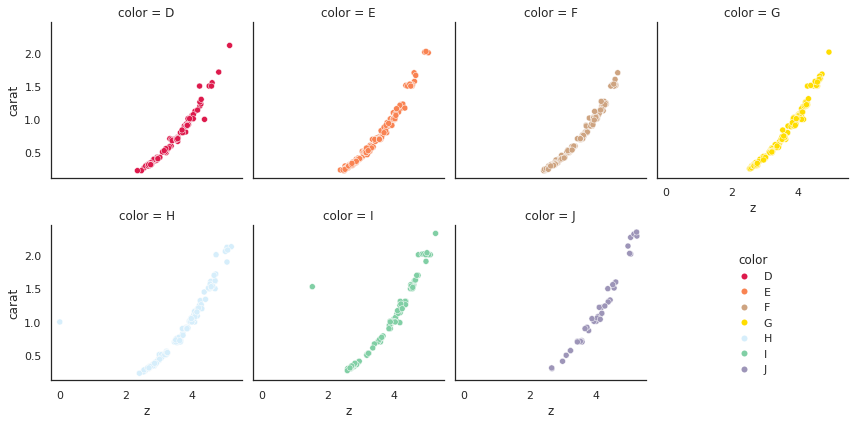

In [13]:
palette = sns.color_palette(['#dd1a4c', '#f98352', '#cea481', '#ffdd00', '#d6eefb', '#81cfa5', '#9d95b8']) #tylko palety kategoryzowane
g = sns.relplot(diamonds.sample(1000),x="z",y="carat",col="color",col_wrap=4,height=3,hue="color",palette=palette)
sns.move_legend(g, "lower left", bbox_to_anchor=(.80, .1)) # przeniesienie legendy względem jej lewej dolnej krawędzi względem początku ryciny

g zwraca figurę. Wykresy typu: `relplot`, `displot`, `catplot` zwracają obiekt poziomu `figure`. Wykresy typu `histplot`, `boxplot` zwracają obiekt poziomu `axes` i mogą być dodawane do układów wykresów utworzonych funkcją subplots z biblioteki matplotlib

### Praca własna

Podzielić wykresy na panele pod względem cięcia. Informację o kolorze dostosować do koloru diamentów

## Przedstawienie zależności między kategoriami
- jak zmienić wykres aby były wyrównane w pionie (multiple)
- jak na osi y przedstawić zróżnicowanie pod względem innego parametru numerycznego (weights)
- jak zmienić opis osi i ustawić jej zakres

Użyjemy ponownie zbioru **diamonds**

<AxesSubplot:xlabel='cut', ylabel='Count'>

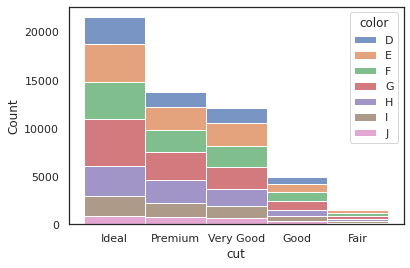

In [14]:

sns.histplot(diamonds,x="cut",hue="color",multiple="stack") 

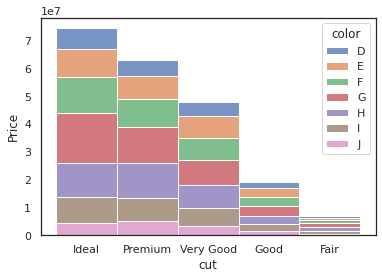

In [15]:
ax = sns.histplot(diamonds,x="cut",hue="color",multiple="stack",weights="price") 
_ = ax.set(ylabel="Price") # to jest metoda matplotlib; _ wysłanie zwracanej wartości do zmiennej null

(0.0, 22000.0)

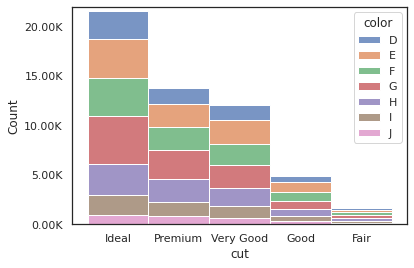

In [16]:
ax = sns.histplot(diamonds,x="cut",hue="color",multiple="stack") 
labels = ['{:,.2f}'.format(x) + 'K' for x in ax.get_yticks()/1000] # podzielone przez tysiąc
_ = ax.set_yticks(ax.get_yticks(),labels) # jest to dziedziczenie po obiekcie axes
ax.set_ylim(0,22000) # ustawienie zakresu

### Praca własna.

Użyć kolorów z poprzedniego przykładu. Poszukać i zaproponować inny układ wykresu.

## Pairplot
- Jak zróżnicować elementy wykresu pairplot
- Zmiana koloru, szerokości linii i wielkości punktu

Użyjemy zbioru **penguins**

In [17]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


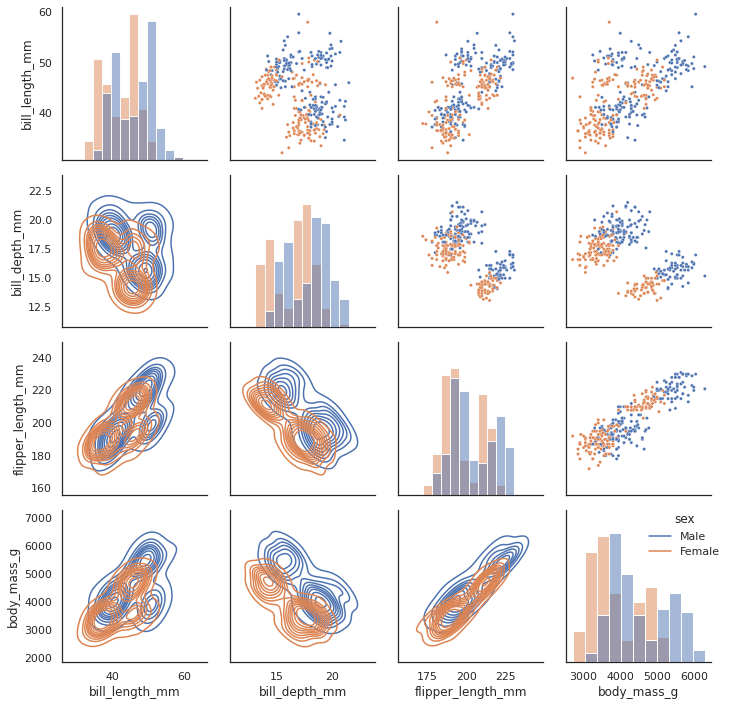

In [18]:
g = sns.PairGrid(penguins,hue="sex") # tu mapujemy aestetics
g.map_upper(sns.scatterplot,s=10) # tu tylko parametry globalne
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, lw=1)
g.add_legend()
try:
    _ = sns.move_legend(sns.move_legend(obj=g, loc="lower left", bbox_to_anchor=(.80, .2)) ) # generuje błąd dlatego opakowane w try... except
except:
    pass

### Praca własna:

Zaproponować inne kolory dla płci. Zmienić wykres przekątnej na wygładzony.

## Wykres punktowy przesdtawiający kilka zmiennych
- Jak zmodyfikować parametry wykresu 
- Jak zmienić paletę barwną i zakres skali markerów
- Jak zmienić osie na logarytmiczne
- Jak dodać własną siatkę

Użyjemy dane diamonds. Naszym clelem jest pokazanie na jednym wykresie zależności pomiędzy liczbą kararów i ceną z podziałem na jakość cięcia i głębię.

Wynik przedstawimy w skali logarytmicznej i dodamy siatkę oraz usuniemy linie osi.

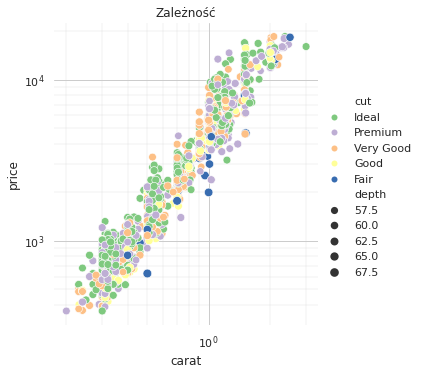

In [19]:
g = sns.relplot(
    diamonds.sample(1000),
    x="carat", y="price",
    hue="cut", size="depth",
    palette='Accent', sizes=(50, 80) # to nie jest do końca logiczne
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25) # dostęp do axes poprzez własność obiektu FacetGrid
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.xaxis.grid(True, "major", linewidth=1)
g.ax.yaxis.grid(True, "major", linewidth=1)
g.despine(left=True, bottom=True)
_ = g.ax.set_title("Zależność") # j.w.


## Stripplot

- Jak połączyć dwa wykresy
- Jak dodać punkt wyznaczający środek wagowy rozkładu

W tym wypadku używamy typu pointplot, którego nazwa jest myląca. Pointplot tworzy punkt, będący średnią wszystkich wartości należących do danej grupy i opcjonalnie dodaje miarę rozrzutu.

Nakładanie wykresów wymaga ich wywołania w tym samym ciągu poleceń, na przykład komórce

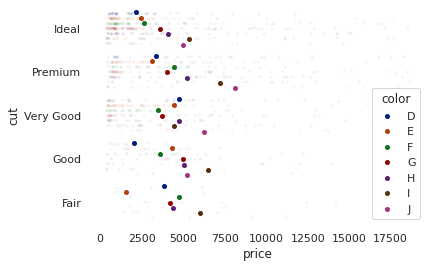

In [20]:

_ = sns.stripplot(
    data=diamonds.sample(1000), y="cut", x="price", hue="color",palette="dark",size=3,
    dodge=True, alpha=.05, zorder=1, legend=False
)

_ = sns.pointplot(
    data=diamonds.sample(1000), y="cut", x="price", hue="color",
    linestyle='none', dodge=0.75, palette="dark",
    markers="o", markersize=3, errorbar=None, 
)

sns.despine(bottom=True, left=True)

### Praca własna

Zaproponować i zmienić symbole dla średnich cen danej grupy diamentów

## Joinplot

- Jak sformatować elementy wykresu z marginal plots

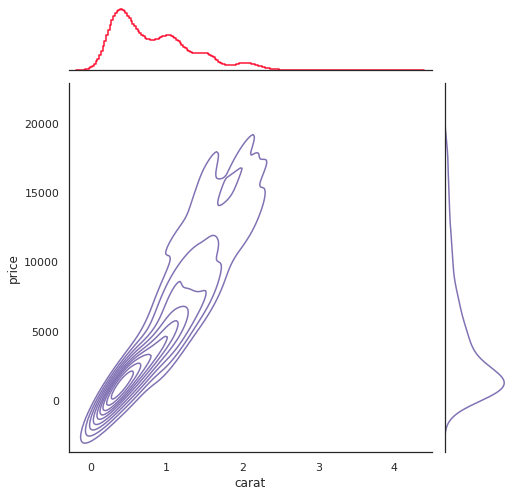

In [17]:
g = sns.jointplot(diamonds.sample(1000),
                x="carat", y="price",
                color="m", height=7,kind="kde") #magenta w jedym z wykresów zmieniamy na żółty

g.ax_marg_x.get_lines()[0].set_color("#FF1133")
g.ax_marg_x.get_lines()[0].set_ds("steps")
 # są to już zaawansowane narzędzia matplotlib, wymagające rozumienia struktury obiektu


## Boxplot

Boxplot w wersji matplotlib jest trudny do zarządania.

- Jak dodać własne kolory
- Jak zrobić poziomy boxplot

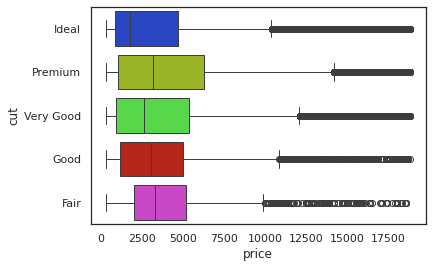

In [21]:
palette = sns.color_palette(["#1135DD","#AACC11","#45EE34","#cc1100","#dd33dd"])
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price",palette=palette) # od 0.13 hue musi być dodawany jawnie

### Praca własna

Zaprponować inny typ wykresu dla przestawienia informacji o rozkładzie w grupach

## Złożone wykresy

Jako przykład złożonego wykresu oferowanego przez seaborn użyjemy tzw. mapy ciepła, albo korelogramu, tj wizualizacji pokazującej grupy podobnych do siebie prób.
Jest to wykres złożony z kilku podwykresów: głównego wykresu, dendrogramów, legendy.

In [23]:
ceramika = pd.read_csv("../DANE/ceramika.csv",index_col=0)
ceramika

,grupa,Al,B,Ba,Ca,Cr,Cu,Fe,K,Mg,Mn,Na,Pb,Sr,Ti,Zn
proba,,,,,,,,,,,,,,,,
GC001,2,22472.53,31.19,230.11,5231.77,24.61,9.45,36424.49,1229.58,2131.18,972.83,225.04,25.45,31.20,44.73,49.96
GC002,2,18536.40,35.47,220.32,5584.33,20.08,10.09,46057.22,962.21,2198.59,2358.47,195.25,27.05,35.49,21.47,45.26
GC003,2,18968.33,32.49,233.40,5951.89,17.62,8.20,38470.94,747.57,1936.91,1682.81,189.91,25.61,37.71,23.03,46.80
GC004,2,27585.09,47.02,277.73,5298.26,35.09,11.53,57129.50,2095.48,2930.05,2053.50,283.63,29.38,36.12,41.93,60.44
GC005,2,18849.86,25.61,232.07,6884.50,16.23,10.88,31687.92,731.80,2275.56,2048.63,190.76,26.68,36.43,16.89,59.85
GC006,2,16132.82,22.59,214.91,5505.47,17.88,6.78,29981.08,544.26,2018.94,1225.43,192.40,19.53,28.37,22.54,24.60
GC007,2,19053.43,29.75,250.56,5418.11,23.25,9.57,42121.26,609.95,2099.08,1605.21,229.63,20.99,37.43,18.11,27.02
GC008,2,18860.28,28.54,238.35,5078.60,23.76,8.03,34224.03,723.02,2369.91,1082.62,287.37,20.25,36.37,19.91,34.31
GC009,2,16338.24,265.15,232.17,1824.14,25.38,9.83,25383.33,1413.89,1640.41,831.76,179.14,15.56,20.80,66.21,63.54


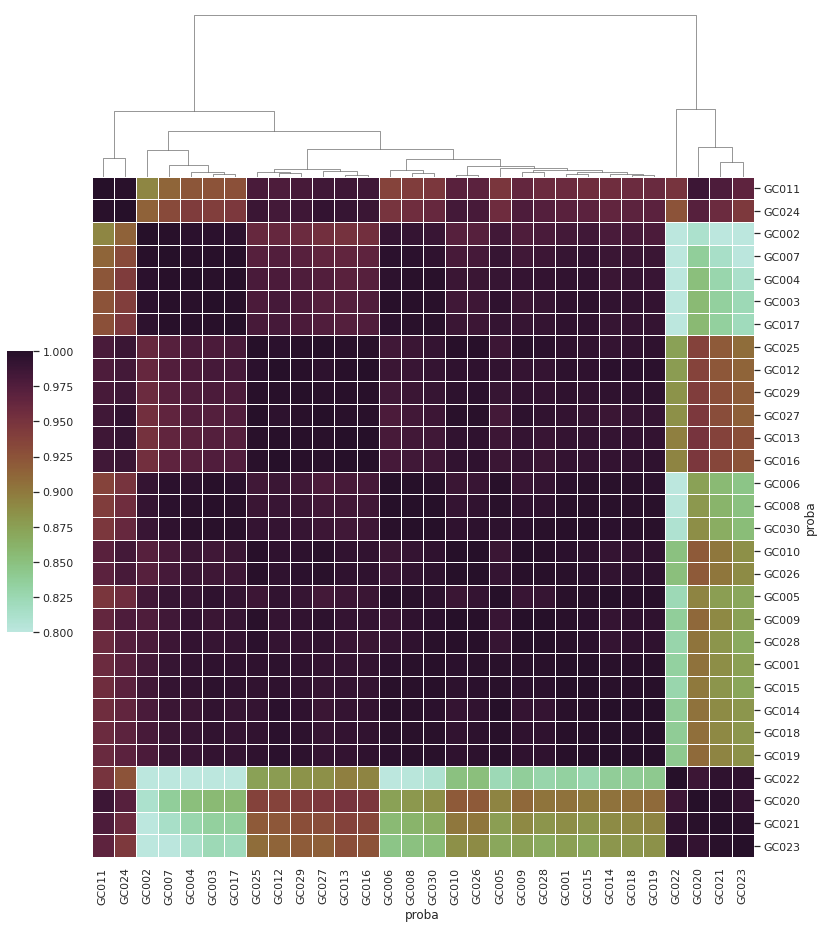

In [24]:
cmap = sns.color_palette("ch:s=0.11,rot=0.87,hue=1,dark=0.1",as_cmap=True)
g = sns.clustermap(ceramika.iloc[:,1:].T.corr(), cmap=cmap,vmin=0.8,dendrogram_ratio=(.15, .2),linewidths=1, figsize=(12, 13),cbar_pos=(.05, .32, .03, .3))
g.ax_row_dendrogram.remove()


### przygotowanie palety kolorów dla grup
wykorzystanie mechanizmu look-up table (LUT) stosowane w kolorach indeksowanych, tj przypisanie koloru do indeksu. Pozwoli to zamarkować grupy w dendrogramie. Wymaga to połączenia w słownik identyfikatora grupy i koloru oraz zamapowania kolorów zgodnie z identyfikatorami grupy.

In [25]:
paleta = sns.husl_palette(3, s=1)
lut = dict(zip(ceramika.grupa.unique(),paleta))
group_colors = ceramika.grupa.map(lut)

In [29]:
group_colors

proba
GC001    (0.9971113841978364, 0.4171594688458531, 0.526...
GC002    (0.9971113841978364, 0.4171594688458531, 0.526...
GC003    (0.9971113841978364, 0.4171594688458531, 0.526...
GC004    (0.9971113841978364, 0.4171594688458531, 0.526...
GC005    (0.9971113841978364, 0.4171594688458531, 0.526...
GC006    (0.9971113841978364, 0.4171594688458531, 0.526...
GC007    (0.9971113841978364, 0.4171594688458531, 0.526...
GC008    (0.9971113841978364, 0.4171594688458531, 0.526...
GC009    (0.9971113841978364, 0.4171594688458531, 0.526...
GC010    (0.9971113841978364, 0.4171594688458531, 0.526...
GC011    (0.2629275039965128, 0.6998079504909376, 0.035...
GC012    (0.9971113841978364, 0.4171594688458531, 0.526...
GC013    (0.9971113841978364, 0.4171594688458531, 0.526...
GC014    (0.9971113841978364, 0.4171594688458531, 0.526...
GC015    (0.9971113841978364, 0.4171594688458531, 0.526...
GC016    (0.9971113841978364, 0.4171594688458531, 0.526...
GC017    (0.9971113841978364, 0.4171594688458531, 

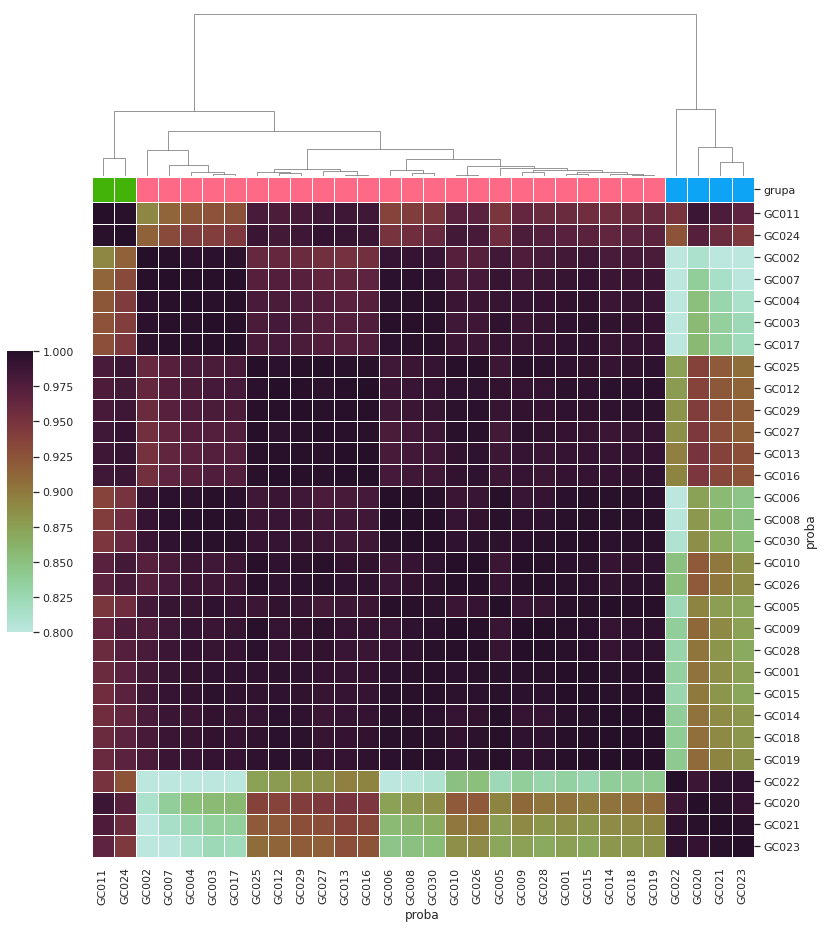

In [26]:
g = sns.clustermap(ceramika.iloc[:,1:].T.corr(), cmap=cmap,vmin=0.8,dendrogram_ratio=(.15, .2),linewidths=1, figsize=(12, 13),cbar_pos=(.05, .32, .03, .3),col_colors=group_colors)
g.ax_row_dendrogram.remove()

## Zarządzanie tematami i stylami

dostępne konteksty (własności związane z wielkością i czytelnością elementów wykresu)
* paper, 
* notebook, 
* talk, 
* poster
  
dostępne wbudowane style seaborn (związane z wyglądem grafiki)
* darkgrid, 
* whitegrid, 
* dark, 
* white, 
* ticks

Theme - łączy style i kontekst. Dostępne czcionki:  'sans-serif', 'serif', 'cursive', 'monospace'.

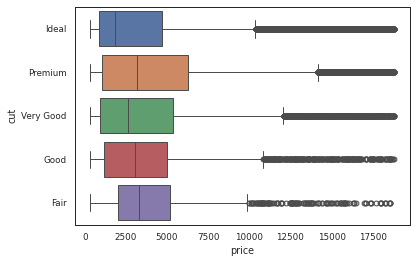

In [27]:
sns.set_context("paper")
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price") 

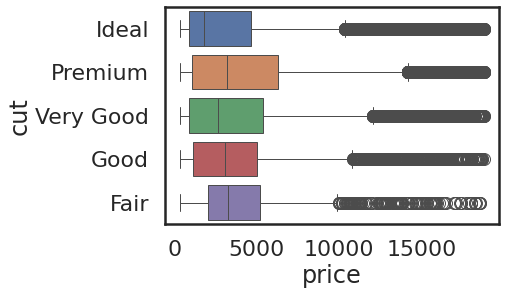

In [28]:
sns.set_context("poster")
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price") 

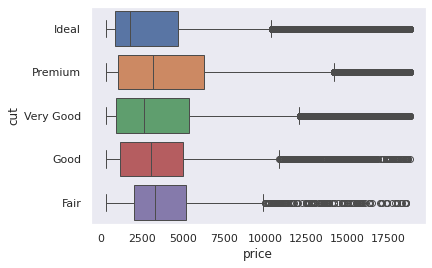

In [29]:
sns.set_context("notebook")
sns.set_style("dark")
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price") 

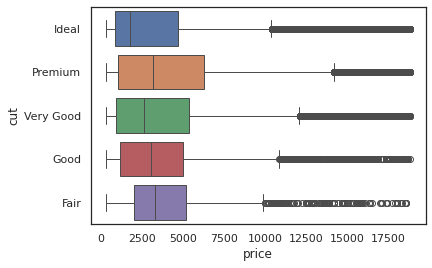

In [30]:
sns.set_style("white")
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price") 

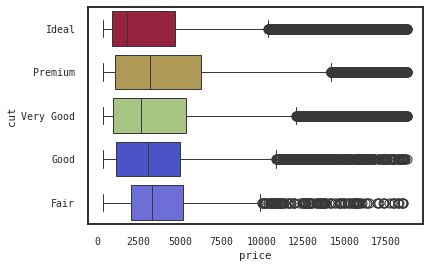

In [31]:
sns.set_theme(style="white",context="talk",palette=sns.blend_palette(["#A13","#CF5","#11F","#CCC"]),font='monospace',font_scale=0.6)
_ = sns.boxplot(diamonds,y="cut",hue='cut',x="price") 